In [1]:
from glidergun import grid

dem = grid("cop-dem-glo-90", (-123.4, 49.1, -122.8, 49.5))

dem, dem.hillshade(), dem.slope().color("viridis"), dem.aspect().color("plasma")


(image: 720x480 float32 | range: -1.620~1750.169 | mean: 230.291 | std: 360.041 | crs: EPSG:4326 | cell: (0.000833, 0.000833) | extent: (-123.400417, 49.100417, -122.800417, 49.500417),
 image: 720x480 float32 | range: 38.106~254.999 | mean: 165.989 | std: 64.521 | crs: EPSG:4326 | cell: (0.000833, 0.000833) | extent: (-123.400417, 49.100417, -122.800417, 49.500417),
 image: 720x480 float32 | range: 0.000~89.752 | mean: 51.147 | std: 38.369 | crs: EPSG:4326 | cell: (0.000833, 0.000833) | extent: (-123.400417, 49.100417, -122.800417, 49.500417),
 image: 720x480 float32 | range: 0.000~359.999 | mean: 116.016 | std: 114.474 | crs: EPSG:4326 | cell: (0.000833, 0.000833) | extent: (-123.400417, 49.100417, -122.800417, 49.500417))

In [2]:
from glidergun import search

item = search("sentinel-2-l2a", (-81.1, 46.4, -80.9, 46.5))[0]

B8A = item.download("B8A")
B04 = item.download("B04")

ndvi = (B8A - B04) / (B8A + B04)

ndvi.kmeans_cluster(3).color("Greens")


image: 768x556 float32 | range: -0.041~0.324 | mean: 0.068 | std: 0.127 | crs: EPSG:32617 | cell: (20.0, 20.0) | extent: (492300.0, 5138500.0, 507660.0, 5149620.0)

In [3]:
from IPython.display import clear_output

from glidergun import grid


def tick(g):
    count = g.focal_sum() - g
    return (g == 1) & (count == 2) | (count == 3)


g = grid((120, 80)).randomize() < 0.5

for _ in range(100):
    g = tick(g)
    clear_output(wait=True)
    display(g)


image: 120x80 bool | range: 0~1 | mean: 0 | std: 0 | crs: 4326 | cell: (0.008333, 0.0125) | extent: (0.0, 0.0, 1.0, 1.0)

In [4]:
from glidergun import stack

url = "https://t.ssl.ak.tiles.virtualearth.net/tiles/a{q}.jpeg?g=15437"
bing = stack(url, (-123.164, 49.272, -123.162, 49.273), max_tiles=10)
bing.save("tests/output/vancouver.tif")

sam = bing.sam3("tree", "house", "car")
sam.save_geojson("tests/output/vancouver.json")

display(tuple(bing * m.mask for m in sam.masks[:10]))

bing, sam.highlight(), sam.mask("car").heat_map()


(image: 39x57 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272803, -123.163792, 49.273002),
 image: 22x24 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272918, -123.163884, 49.273002),
 image: 12x29 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272901, -123.163937, 49.273002),
 image: 14x24 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272918, -123.163927, 49.273002),
 image: 26x20 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272932, -123.163862, 49.273002),
 image: 11x13 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272957, -123.163943, 49.273002),
 image: 25x65 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272775, -123.163868, 49.273002),
 image: 24x20 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272932, -123.163873, 49.273002),
 image: 48x30 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272897, -123.163744, 49.273002),
 image: 18x18 float32 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272939, -123.163905, 49.273002))

(image: 373x286 uint8 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272001, -123.162001, 49.273002),
 image: 373x286 uint8 | crs: EPSG:4326 | count: 3 | rgb: (1, 2, 3) | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272001, -123.162001, 49.273002),
 image: 373x286 float32 | range: 0.100~1.000 | mean: 0.318 | std: 0.175 | crs: EPSG:4326 | cell: (5e-06, 4e-06) | extent: (-123.164002, 49.272001, -123.162001, 49.273002))

image: 1489x1340 uint8 | crs: EPSG:32610 | count: 3 | rgb: (1, 2, 3) | cell: (10.0, 10.0) | extent: (542310.0, 4172650.0, 557200.0, 4186050.0)

(image: 1489x1340 uint8 | range: 0~255 | mean: 72 | std: 60 | crs: EPSG:32610 | cell: (10.0, 10.0) | extent: (542310.0, 4172650.0, 557200.0, 4186050.0),
 image: 1489x1340 uint8 | range: 0~255 | mean: 80 | std: 50 | crs: EPSG:32610 | cell: (10.0, 10.0) | extent: (542310.0, 4172650.0, 557200.0, 4186050.0),
 image: 1489x1340 uint8 | range: 0~255 | mean: 68 | std: 49 | crs: EPSG:32610 | cell: (10.0, 10.0) | extent: (542310.0, 4172650.0, 557200.0, 4186050.0))

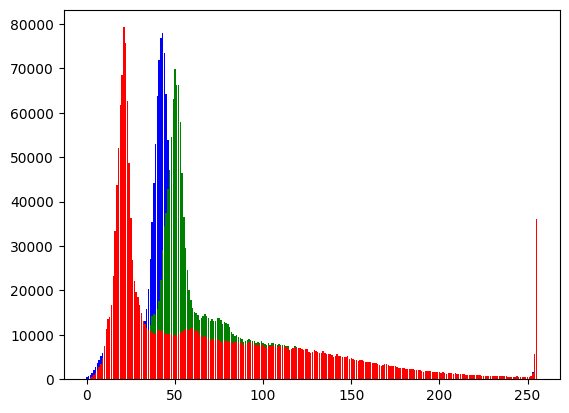

In [5]:
from glidergun import search

results = search("sentinel-2-l2a", (-122.52, 37.70, -122.35, 37.82), cloud_cover_percent=5.0)

rgb = results[0].download("visual")
display(rgb)
display(rgb.grids)

rgb.hist()
